# Programming for Data Science Project
## Group 10:
- Carolina Gonçalves Silva Simão (m20190418)
- Filipa de Castro Fernandes (m20190717)
- Pedro Maria Fragoso de Almeida Carvalho (m20190417)
- Teresa Sofia da Costa Trindade (m20190629)


### Description of the project:
- Imagine yourselves as a Data Scientists or Business Analysts consultants in the Tourism Sector. Therefore, you must understand the trends as well the opportunities raising around the world. A potential client comes up with a dataset and he is willing to know where he should invest next, particularly in the tourism sector. No specific goal was provided just a desire to obtaining new insights that can lead to a more balanced outcome regarding risk and profit. What are the possible outcomes and arguments to be delivered?

### Our analysis:
- Given the description of the project, we decided to upload various datasets, in order to empower our analysis and the final result. We chose to analyze the year range 2010-2017. Throughout the analysis of the datasets, we agreed we would set a range of values for each variable (based on the mean value of our analysis range), so that we would get the better ones for each specific dataset. After we analyzed pretty much all of our datasets, we performed the concat() method and it gave us the best outcome, according to our work.

**1.** Import libraries needed for the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib
from matplotlib import pyplot as plt

import skimage
from skimage import io

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**2.** We decided to perfom a class with multiple functions. We used github as our folder to get the chosen datasets: 
- Peace - Global Peace Index;
- Human Development Index;
- Income;
- Precipitation - average precipitation in depth (mm per year);
- Pollution - air pollution, mean annual exposure (micrograms per cubic meter);
- Tourism Receipts - international tourism, receipts (% of total exports);
- Area - surface area (sq. km);
- Business - time required to start a business (days);
- Population;
- Travel - international tourism, number of arrivals.

**3.** After getting our datasets, we took a look at the dataframes and we saw that some of them had different designs. In order to fix that, we developed another function to download the csv as we wanted. We had two datasets that needed different transformations when uploaded and the others could be transformed in the same way. We put the "Country Code" as the index of all data frames.

**4.** Completed the last steps, we assign the csv's to a data frame name and still performed simple transformations. We also dropped the NaN values when the entire row or column was containing them.

In [2]:
class getCsv:
    
    # Define the path where our datasets are being hold
    def __init__(self):
        self.url_list = ['https://raw.githubusercontent.com/carolinasimao/PDS/master/peace.csv', 
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/human.csv', 
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/income.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/precipitation.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/pollution.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/tourism_receipts.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/area.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/business.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/population.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/travel.csv'
                        ]
        self.names_index = ["peace", "human_development", "income", "precipitation", "pollution", "tourism_receipts",
                             "area", "population", "travel"]
        self.df = []
        
        
        
    def downloadCsv(self):
       
    # Different data treatment for different datasets
        for i in self.url_list:
            if i == 'https://raw.githubusercontent.com/carolinasimao/PDS/master/income.csv':
                self.df.append(pd.read_csv(i, index_col = [2,0], quotechar = '"', header = 0, delimiter = ";",
                                         skiprows = 1,
                                         names = ["Country Code", "Region", "IncomeGroup", "SpecialNotes", "Country Name"],
                                         usecols = ["Country Code", "Country Name", "IncomeGroup"]))
            else:
                if i == 'https://raw.githubusercontent.com/carolinasimao/PDS/master/human.csv':
                    self.df.append(pd.read_csv(i, index_col = [0,1], quotechar = '"', header = 0, delimiter = ";",
                                              skiprows = 1,
                                              names = ["indicatorID", "indicatorLabel", "Country Code", "Country Name", "Year", "Value"],
                                              usecols = ["Country Code", "Country Name", "Year", "Value"])) 
                
                else:
                    self.df.append(pd.read_csv(i, index_col = [0,1], quotechar = '"', header = 0, delimiter = ";",
                                          usecols = ["Country Code", "Country Name", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]))
            
            
    # Change the name of the datasets into something more intuitive and drop the rows and columns with NaN values       
    def assignCsv(self):
        df_peace = self.df[0].dropna(how="all", axis = [0,1]).loc[:,::-1]
        df_human_development = pd.pivot_table(self.df[1].dropna(how="all", axis = [0,1]),values='Value', index=['Country Name', 'Country Code'], columns=['Year']).iloc[:,2:]
        df_income = self.df[2].dropna(how="all", axis = [0,1])
        df_precipitation = self.df[3].dropna(how="all", axis = [0,1])
        df_pollution = self.df[4].dropna(how="all", axis = [0,1])
        df_tourism_receipts = self.df[5].dropna(how="all", axis = [0,1])
        df_area = self.df[6].dropna(how="all", axis = [0,1])
        df_business = self.df[7].dropna(how="all", axis = [0,1])
        df_population = self.df[8].dropna(how="all", axis = [0,1])
        df_travel = self.df[9].dropna(how="all", axis = [0,1])
        
        return df_peace, df_human_development, df_income, df_precipitation, df_pollution, df_tourism_receipts, df_area, df_business, df_population, df_travel

data = getCsv()
data.downloadCsv()

[df_peace,df_human_development,df_income,df_precipitation,df_pollution,df_tourism_receipts,df_area,df_business,df_population,df_travel] = data.assignCsv()

**5.** As previously said, we are performing value ranges in our datasets based on the media verified in the period 2010-2017. In some datasets we want to select the countries that are equal or above the mean (Tourism Receipts, Human Development Index), and others the countries that are equal or below the mean (Global Peace Index, Precipitation, Pollution and Days to Start a Business). After all data frames having the format we need, we decided to add to our function a line plot that shows the evolution through our period (2010-2017). Note that for precipitation we only have data regarding the years 2012 and 2014.

In [3]:
def performAverages(df_peace, df_human_development, df_income, df_precipitation, df_pollution,
                    df_tourism_receipts, df_area, df_business, df_population, df_travel):
    
    data1 = {0:df_peace, 1:df_precipitation, 2:df_tourism_receipts, 3:df_pollution, 4:df_business, 5:df_human_development}
    
    names = ['Peace Index', 'Precipitation', 'Tourism Receipts', 'Pollution', 'Number of Days to Start a Business',
              'Human Development Index']
    
    # For these datasets we want the countries that are above the mean
    data1_abov = {2:df_tourism_receipts, 5:df_human_development} 
    
    # For these datasets we want the countries that are bellow the mean
    data1_below = {0:df_peace, 1:df_precipitation, 3:df_pollution, 4:df_business}

    
    for i in data1:
        
        # Add a column in each dataset with the mean of the years for each country
        data1[i]['av_year'] = data1[i].mean(axis = 1) 
        print("Average", names[i], ":", round(data1[i]['av_year'].mean(),2))
        
        # Select the countries that are above the mean and order them in ascending way
        if i in data1_abov:
            data1[i] = data1[i][data1[i].av_year >= round(data1[i]['av_year'].mean(),2)]
            data1[i] = data1[i].sort_values(by = 'av_year', ascending = True).drop(columns = 'av_year')
        
        # Select the countries that are bellow the mean and order them in descending way
        if i in data1_below:
            data1[i] = data1[i][data1[i].av_year <= round(data1[i]['av_year'].mean(),2)]
            data1[i] = data1[i].sort_values(by = 'av_year', ascending = False).drop(columns = 'av_year')

        data1[i].head().T.plot.line()
    
    df_peace = data1[0]
    df_precipitation = data1[1]
    df_tourism_receipts = data1[2]
    df_pollution = data1[3]
    df_business = data1[4]
    df_human_development = data1[5]
    
    return df_peace, df_precipitation, df_tourism_receipts, df_pollution, df_business, df_human_development

**8. Mean and the line plots:** Calculate the mean using the function previously created and plot the respective graphs.

Average Peace Index : 2.09
Average Precipitation : 1119.62
Average Tourism Receipts : 15.88
Average Pollution : 29.98
Average Number of Days to Start a Business : 27.18
Average Human Development Index : 0.69


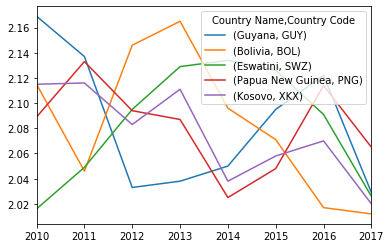

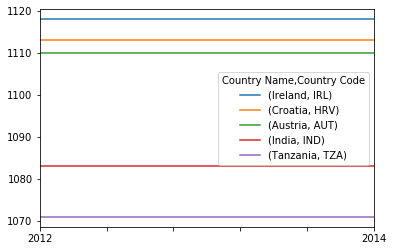

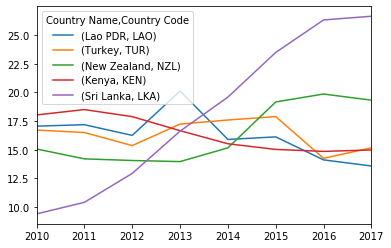

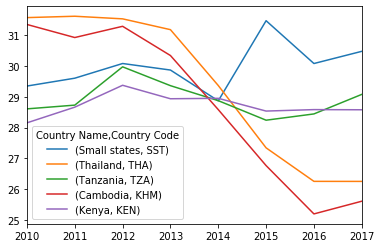

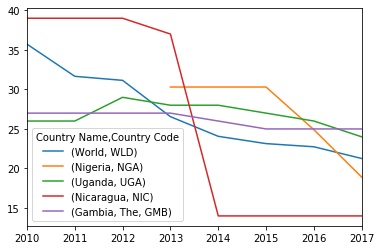

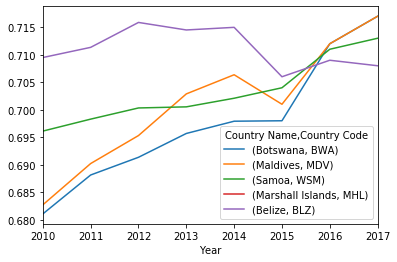

In [4]:
df_peace, df_precipitation, df_tourism_receipts, df_pollution, df_business, df_human_development = performAverages(df_peace, df_human_development, df_income, df_precipitation, df_pollution,df_tourism_receipts, df_area, df_business, df_population, df_travel)

**7.** This function provides the population density for the datasets if there are both values for each country. 

In [5]:
def populationDensity(df_population, df_area):
    
    # Determine the intersection between population and area
    df_area_population = pd.merge(df_area.loc[:,['2017']], df_population, how = 'inner', on = 'Country Name')
    
    # Load data onto two numpy arrays for better performance
    density = np.array(df_area_population.loc[:,'2017_y'])/np.array(df_area_population.loc[:,'2017_x'])
    
    # Introduce the newly created data in the dataframe
    df_area_population['Pop. Density'] = density
    
    # Output for this function
    return pd.DataFrame(df_area_population['Pop. Density'])

In [6]:
df_density = populationDensity(df_population, df_area)

**8.** The function bellow normalizes arrays and prepares them for clustering using min-max.

In [7]:
def minMax(my_array):
    
    # Declaration of an array and its shape
    my_array_normalized = np.zeros(shape = my_array.shape)
    
    # Determination of maximum and minimum values of the array
    my_max = max(my_array)
    my_min = min(my_array)
    
    # Performing the nomalization of the array
    for j in range(len(my_array)): 
        my_array_normalized[j] = (my_array[j] - my_min) / (my_max - my_min)
        
    # Outputting the normalized array
    return my_array_normalized

**9. PEACE INDEX -** We believe that people are concerned about their safety while going on vacations. In general people don't want to travel to war countries or to places where they don't feel safe and relaxed. Therefore, we decided to consider the Peace Index and we selected the countries below our average mean (2.09).

In [8]:
df_peace

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Guyana,GUY,2.169,2.137,2.033,2.038,2.050,2.095,2.122,2.029
Bolivia,BOL,2.115,2.046,2.146,2.165,2.096,2.071,2.017,2.012
Eswatini,SWZ,2.016,2.049,2.095,2.129,2.134,2.126,2.091,2.026
Papua New Guinea,PNG,2.089,2.133,2.094,2.087,2.025,2.048,2.114,2.065
Kosovo,XKX,2.115,2.116,2.083,2.111,2.038,2.058,2.070,2.020
...,...,...,...,...,...,...,...,...,...
Japan,JPN,1.328,1.333,1.346,1.309,1.330,1.315,1.374,1.377
Austria,AUT,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292
New Zealand,NZL,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216


**9.1.** Check the difference between the countries that had the best index peace in 2010 and in 2017.

**2010:**

In [9]:
df_peace_best_year10 = df_peace.sort_values(by = ['2010'], ascending = True)
pd.DataFrame(df_peace_best_year10)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Iceland,ISL,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084
New Zealand,NZL,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216
Japan,JPN,1.328,1.333,1.346,1.309,1.330,1.315,1.374,1.377
Denmark,DNK,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299
Austria,AUT,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292
...,...,...,...,...,...,...,...,...,...
Montenegro,MNE,2.122,2.143,2.082,1.908,1.941,1.949,1.878,1.949
Kazakhstan,KAZ,2.123,2.089,2.100,1.999,2.097,2.021,2.010,1.958
Nepal,NPL,2.138,2.207,2.110,2.057,1.981,1.885,2.003,2.048


**2017:** We can see that Portugal is one of the top countries in 2017, even though in 2010 Japan was the one in third place.

In [10]:
df_range_best_year17 = df_peace.sort_values(by = ['2017'], ascending = True)
pd.DataFrame(df_range_best_year17)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Iceland,ISL,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084
New Zealand,NZL,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216
Portugal,PRT,1.472,1.485,1.520,1.525,1.466,1.418,1.324,1.273
Austria,AUT,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292
Denmark,DNK,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299
...,...,...,...,...,...,...,...,...,...
Papua New Guinea,PNG,2.089,2.133,2.094,2.087,2.025,2.048,2.114,2.065
Lesotho,LSO,1.918,1.949,1.894,1.884,1.865,1.915,1.955,2.065
Burkina Faso,BFA,1.791,1.750,1.772,1.910,1.824,1.896,2.047,2.074


**9.2.** Follium graph representing the countries with the best index peace in 2017.

In [11]:
#apply the follow if needed:
#!pip install folium
import folium

b = folium.Map(
        location=[40.033265, -7.8896263], # Coordinates where the map opens (center)
        zoom_start=1.5,
        tiles='Stamen Terrain')

folium.Marker(
    location=[64.9841821, -18.1059013],
    popup='Iceland',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[-41.5000831, 172.8344077],
    popup='New Zealand',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[40.033265, -7.8896263],
    popup='Portugal',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[47.2000338, 13.199959],
    popup='Austria',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[55.670249, 10.3333283],
    popup='Denmark',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)
    
b

**10. HUMAN DEVELOPMENT INDEX -** We chose Human Development Index as one of our decision variables since this index emphasizes the development of a country and not the economic growth alone. Here we selected the countries above our average mean (0.69).

In [12]:
df_human_development

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Botswana,BWA,0.681066,0.688141,0.691360,0.695690,0.697919,0.698,0.712,0.717
Maldives,MDV,0.682715,0.690221,0.695311,0.702883,0.706365,0.701,0.712,0.717
Samoa,WSM,0.696122,0.698297,0.700328,0.700528,0.702094,0.704,0.711,0.713
Marshall Islands,MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708
Belize,BLZ,0.709494,0.711344,0.715874,0.714505,0.714982,0.706,0.709,0.708
...,...,...,...,...,...,...,...,...,...
Netherlands,NLD,0.909236,0.919071,0.920454,0.920442,0.921794,0.924,0.928,0.931
Denmark,DNK,0.908388,0.920488,0.921084,0.922809,0.923328,0.925,0.928,0.929
Switzerland,CHE,0.924370,0.924559,0.926960,0.928312,0.929613,0.939,0.943,0.944


**10.1.** Get the order of the columns by descending order (according to the year 2017).

In [13]:
df_human_development_desc = df_human_development.sort_values(by=[2017], ascending=False)
df_human_development_desc

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Norway,NOR,0.939844,0.940697,0.942293,0.942322,0.943877,0.949,0.951,0.953
Switzerland,CHE,0.924370,0.924559,0.926960,0.928312,0.929613,0.939,0.943,0.944
Australia,AUS,0.927410,0.929656,0.932190,0.933389,0.934958,0.939,0.938,0.939
Ireland,IRL,0.908000,0.908905,0.909851,0.912306,0.915542,0.923,0.934,0.938
Germany,DEU,0.906467,0.910604,0.914763,0.915162,0.916080,0.926,0.934,0.936
...,...,...,...,...,...,...,...,...,...
Samoa,WSM,0.696122,0.698297,0.700328,0.700528,0.702094,0.704,0.711,0.713
Belize,BLZ,0.709494,0.711344,0.715874,0.714505,0.714982,0.706,0.709,0.708
Marshall Islands,MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708


**10.2.** Get the Top 5 countries of 2017.

In [14]:
df_human_development_desc_top5 = df_human_development_desc.head()
df_human_development_desc_top5

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Norway,NOR,0.939844,0.940697,0.942293,0.942322,0.943877,0.949,0.951,0.953
Switzerland,CHE,0.924370,0.924559,0.926960,0.928312,0.929613,0.939,0.943,0.944
Australia,AUS,0.927410,0.929656,0.932190,0.933389,0.934958,0.939,0.938,0.939
Ireland,IRL,0.908000,0.908905,0.909851,0.912306,0.915542,0.923,0.934,0.938
Germany,DEU,0.906467,0.910604,0.914763,0.915162,0.916080,0.926,0.934,0.936


**10.3.** Distribution plot - Histogram with a kernel density estimate (KDE) - representing the Top 5 countries with the highest Human Development Index.

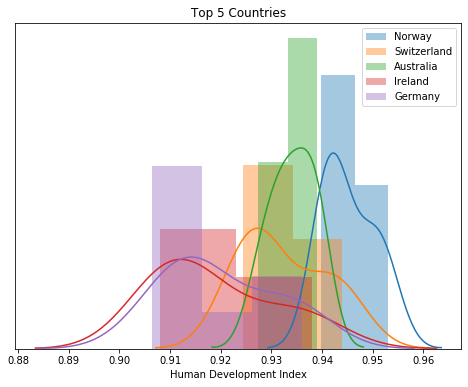

In [15]:
df_human_development_t = df_human_development_desc_top5.T
df_human_development_t

a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sb.distplot(df_human_development_t['Norway'],
             hist=True, 
            label='Norway')
sb.distplot(df_human_development_t['Switzerland'],
             hist=True,
            label='Switzerland')
sb.distplot(df_human_development_t['Australia'],
             kde=True,
             hist=True,
            label = 'Australia')
sb.distplot(df_human_development_t['Ireland'],
             kde=True,
             hist=True,
            label = 'Ireland')
sb.distplot(df_human_development_t['Germany'],
             kde=True,
             hist=True,
            label = 'Germany')

plt.legend()
plt.title('Top 5 Countries')
plt.xlabel('Human Development Index')
plt.yticks([])
plt.show()

**11. INCOME -** This dataset was already provided by our client. We will not consider it as one of the decision variables, we look at it for information purposes only. We believe that the income would be more relevant if we were studying where tourists are coming from, but we are trying to figure out where they are going to.

In [16]:
df_income

,,IncomeGroup
Country Name,Country Code,
Afghanistan,AFG,Low income
Angola,AGO,Lower middle income
Albania,ALB,Upper middle income
Andorra,AND,High income
United Arab Emirates,ARE,High income
...,...,...
Kosovo,XKX,Upper middle income
"Yemen, Rep.",YEM,Low income
South Africa,ZAF,Upper middle income


**11.1.** Get the High Income.

In [17]:
df_high_income=df_income[df_income['IncomeGroup'] == 'High income']
df_high_income

,,IncomeGroup
Country Name,Country Code,
Andorra,AND,High income
United Arab Emirates,ARE,High income
Antigua and Barbuda,ATG,High income
Australia,AUS,High income
Austria,AUT,High income
...,...,...
Trinidad and Tobago,TTO,High income
Uruguay,URY,High income
United States,USA,High income


**11.2.** Graphic representing the weight of the Income Groups.

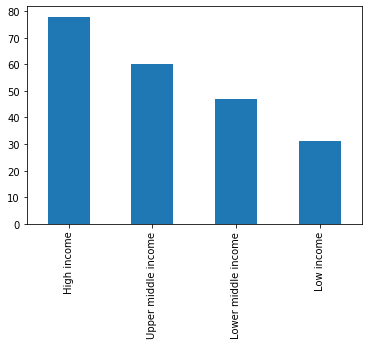

In [18]:
df_income['IncomeGroup'].value_counts().plot('bar')

**12. NUMBER OF DAYS TO START A BUSINESS -** This is one of the datasets we considered important not for the study of the tourism but for our client himself. As a business man, we believe this is relevant information. Here we selected the countries below our average mean (27.18). 

In [19]:
df_business

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
World,WLD,35.728488,31.656322,31.144382,26.550265,24.065079,23.144211,22.743684,21.259474
Nigeria,NGA,NaN,NaN,NaN,30.300000,30.300000,30.300000,24.900000,18.900000
Uganda,UGA,26.000000,26.000000,29.000000,28.000000,28.000000,27.000000,26.000000,24.000000
Nicaragua,NIC,39.000000,39.000000,39.000000,37.000000,14.000000,14.000000,14.000000,14.000000
"Gambia, The",GMB,27.000000,27.000000,27.000000,27.000000,26.000000,25.000000,25.000000,25.000000
...,...,...,...,...,...,...,...,...,...
"Hong Kong SAR, China",HKG,6.000000,2.500000,2.500000,2.500000,2.500000,1.500000,1.500000,1.500000
Singapore,SGP,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
Australia,AUS,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


**12.1.** The 10 countries that take the less days to start a business.

In [20]:
df_business.sort_values(by = '2017', ascending = True).head(10)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
New Zealand,NZL,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
"Hong Kong SAR, China",HKG,6.0,2.5,2.5,2.5,2.5,1.5,1.5,1.5
Canada,CAN,5.5,5.5,5.5,5.5,5.5,1.5,1.5,1.5
Georgia,GEO,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Australia,AUS,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Singapore,SGP,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Jamaica,JAM,8.0,7.0,7.0,6.0,15.0,3.0,10.0,3.0
Netherlands,NLD,8.0,8.0,5.0,4.0,3.5,3.5,3.5,3.5
Denmark,DNK,6.0,6.0,6.0,6.0,6.0,3.5,3.5,3.5


**13. PRECIPITATION -** We tried to find a dataset related to the country temperature but only found information about precipitation. We agreed that people are more attracted to countries with less precipitation, so we accepted the risk of loosing some relevant countries and therefore we selected the countries below our average mean (1119.62). 

In [21]:
df_precipitation

,,2012,2014
Country Name,Country Code,,
Ireland,IRL,1118.0,1118.0
Croatia,HRV,1113.0,1113.0
Austria,AUT,1110.0,1110.0
India,IND,1083.0,1083.0
Tanzania,TZA,1071.0,1071.0
...,...,...,...
Qatar,QAT,74.0,74.0
Saudi Arabia,SAU,59.0,59.0
Libya,LBY,56.0,56.0


**13.1.** The 10 countries where it rains the least.

In [22]:
df_precipitation.sort_values(by = '2014', ascending = True).head(10)

,,2012,2014
Country Name,Country Code,,
"Egypt, Arab Rep.",EGY,51.0,51.0
Libya,LBY,56.0,56.0
Saudi Arabia,SAU,59.0,59.0
Qatar,QAT,74.0,74.0
United Arab Emirates,ARE,78.0,78.0
Bahrain,BHR,83.0,83.0
Algeria,DZA,89.0,89.0
Mauritania,MRT,92.0,92.0
Jordan,JOR,111.0,111.0


**14. TOURISM RECEIPTS -** Another variable that we considered relevant for our client since we want him to get the best deal possible. We selected the countries above our average mean (15.88).

In [23]:
df_tourism_receipts

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Lao PDR,LAO,17.055027,17.182409,16.248954,20.117974,15.897429,16.120504,14.115181,13.583984
Turkey,TUR,16.715678,16.499864,15.359463,17.235435,17.591716,17.887041,14.251514,15.165142
New Zealand,NZL,15.066311,14.203822,14.062028,13.965211,15.162226,19.165120,19.854826,19.321099
Kenya,KEN,18.033931,18.499550,17.884201,16.660230,15.520572,15.027605,14.855382,14.981130
Sri Lanka,LKA,9.405397,10.415827,12.937027,16.618772,19.587659,23.478498,26.312689,26.634625
...,...,...,...,...,...,...,...,...,...
Sint Maarten (Dutch part),SXM,NaN,71.008941,72.983089,70.984852,73.907650,75.101559,74.822792,69.624224
Vanuatu,VUT,74.355509,71.037935,75.179652,80.319409,71.519092,78.934353,NaN,NaN
Palau,PLW,79.444611,81.927522,82.806602,84.034697,82.738081,87.129947,84.302967,NaN


**14.1.** The 10 countries that have more tourism receipts.

In [24]:
df_tourism_receipts.sort_values(by = '2017', ascending = False).head(10)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
"Macao SAR, China",MAC,91.892076,93.486002,93.155411,93.448911,92.113599,89.127137,89.853281,88.033474
Maldives,MDV,85.332743,80.416532,81.739448,83.290522,85.202532,85.561534,83.874660,86.952005
Grenada,GRD,60.948321,59.638516,59.082486,57.214624,81.489010,83.319729,83.234200,85.426505
St. Lucia,LCA,50.749910,56.036378,55.787898,57.624296,81.490135,80.244441,81.789420,81.216293
Dominica,DMA,54.002936,55.510282,47.421152,48.335303,79.184227,78.936972,76.989567,77.861955
St. Vincent and the Grenadines,VCT,46.947007,50.329863,49.926426,47.416954,69.707419,74.745832,75.657245,76.853417
"Bahamas, The",BHS,67.553022,64.830319,63.476177,63.565971,65.641100,74.765013,77.293014,76.200818
Sao Tome and Principe,STP,45.651966,54.186903,45.541621,62.966946,64.410159,69.456925,71.558913,71.510788
Sint Maarten (Dutch part),SXM,NaN,71.008941,72.983089,70.984852,73.907650,75.101559,74.822792,69.624224


**15. POLLUTION -** Nowadays society has become more aware and more concerned about the pollution and the environment so we decided to take it into consideration. We chose the countries below our average mean (29.98).

In [25]:
df_pollution

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Small states,SST,29.347142,29.601827,30.077859,29.865959,28.868198,31.464942,30.077330,30.472246
Thailand,THA,31.565399,31.609629,31.525315,31.174724,29.364641,27.344567,26.258055,26.256727
Tanzania,TZA,28.607533,28.728769,29.969845,29.359633,28.873716,28.240449,28.443570,29.076641
Cambodia,KHM,31.343136,30.919624,31.283733,30.336530,28.583366,26.769239,25.202875,25.614292
Kenya,KEN,28.154771,28.662885,29.372280,28.935345,28.949350,28.536280,28.583377,28.578374
...,...,...,...,...,...,...,...,...,...
Iceland,ISL,7.856537,8.098885,7.336929,7.171207,6.948897,6.927969,6.607654,6.481147
Brunei Darussalam,BRN,7.417004,7.366187,7.570823,6.709490,6.180830,6.484180,5.927600,5.903065
Sweden,SWE,7.209759,7.391221,6.627942,6.431169,6.959198,6.322498,6.114258,6.184665


**15.1** The 10 countries where there is the least pollution.

In [26]:
df_pollution.sort_values(by = '2017', ascending = True).head(10)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Finland,FIN,7.190331,7.283700,6.601134,6.278689,6.468640,6.063834,5.893757,5.861331
Brunei Darussalam,BRN,7.417004,7.366187,7.570823,6.709490,6.180830,6.484180,5.927600,5.903065
New Zealand,NZL,7.152866,7.420696,6.835836,6.781886,6.357904,6.330434,5.987363,5.956001
Sweden,SWE,7.209759,7.391221,6.627942,6.431169,6.959198,6.322498,6.114258,6.184665
Canada,CAN,8.384457,8.624461,8.107410,7.791636,7.428420,7.151582,6.549075,6.428383
Iceland,ISL,7.856537,8.098885,7.336929,7.171207,6.948897,6.927969,6.607654,6.481147
Estonia,EST,8.519849,8.442559,7.810699,7.482814,7.705553,7.003728,6.821448,6.732124
Norway,NOR,8.341507,8.853511,7.925281,7.633675,7.670896,7.242775,6.959457,6.956520
North America,NAC,9.263171,9.630811,8.914901,8.641442,8.142226,7.973351,7.321048,7.311094


**16. POPULATION DENSITY -** This is another variable we used for information purposes only. With the study of the population density we can see if we are talking about a more urban or rural country. If we consider the population density with the number of arrivals we can see if people are more into countries where there is less people and more nature or the other way around. We started with data manipulation to prepare it for clustering.

In [27]:
# Intersection of the data, for there might be missing values
df_density_travel_raw = pd.merge(df_density, df_travel, how = 'inner', on = 'Country Name')
df_density_travel = df_density_travel_raw.loc[:,['Pop. Density','2017']]

# Dropping rows if one of the values are NaN
df_density_travel.dropna(inplace = True)

# Performing the normalization of the numpy arrays
density_notnorm = np.array(df_density_travel.loc[:,'Pop. Density'])
travel_notnorm = np.array(df_density_travel.loc[:,'2017'])
density = minMax(density_notnorm)
travel = minMax(travel_notnorm)

# Alocating the data into a dataframe
df_density_travel.loc[:,'Pop. Density'] = density
df_density_travel.loc[:,'2017'] = travel

**16.1.** Plotting data from the Population Density vs Population Travel.

In [28]:
df_density_travel=df_density_travel.rename(columns={'2017':'Pop. Travel'})
df_density_travel

,Pop. Density,Pop. Travel
Country Name,,
Aruba,0.028488,0.000796
Angola,0.001071,0.000193
Albania,0.004784,0.003459
Arab World,0.001687,0.061286
Argentina,0.000676,0.005008
...,...,...
World,0.002681,1.000000
Samoa,0.003262,0.000107
South Africa,0.002186,0.007665


**16.2.** Finding the optimal number of clusters.

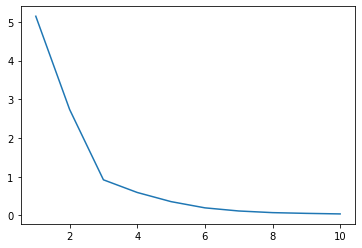

In [29]:
from sklearn.cluster import KMeans

# Creating an empty list to append values to it later on
wcss=[]

# Calculating error for diferent number of seeds for clustering
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_density_travel)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
# Plotting the number of clusters vs error and choosing the number of clusters based on the elbow method
number_cluster = range(1,11)
plt.plot(number_cluster,wcss)

**16.3.** Clustering the data. This will be useful to categorize destinations as urban (high population density) or nature (low population density) oriented and how popular they are. We can see that low population density is more popular.

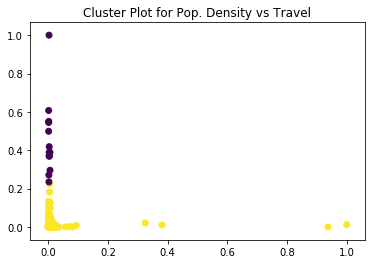

In [30]:
from scipy.cluster.vq import kmeans, vq, kmeans2

# Clustering using scipy and the number of clusters previously determined, which is 3
centroids,labels = kmeans2(df_density_travel, k = 3)

# Plotting the results using different colors according to the labels retrieved
plt.plot()
plt.title('Cluster Plot for Pop. Density vs Travel')
plt.scatter(density, travel, c = labels)
plt.show()

**17.** All variables that allowed us to filter countries can now be joined using the concat() method. This way, we will get the final countries that "survived" all our filters, and that we think should be the ones the potential client should invest. We also add the Income Group so that we could give another meaning to the countries.

In [31]:
result = pd.concat([df_peace, df_human_development, df_business, df_precipitation, df_tourism_receipts, df_pollution, df_income], 
                   axis = 1, sort = False).dropna()
result.iloc[:,-1:]

,,IncomeGroup
Country Name,Country Code,
Croatia,HRV,High income
Cyprus,CYP,High income
Greece,GRC,High income
Portugal,PRT,High income


**18.** We can see that all the chosen countries are more "nature" countries than "urban" countries.

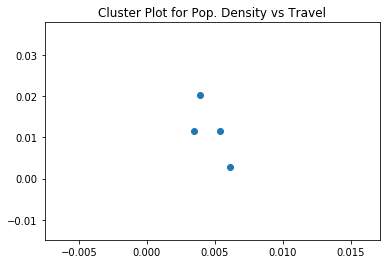

In [32]:
plt.plot()
plt.title('Cluster Plot for Pop. Density vs Travel')
plt.scatter(df_density_travel.loc[['Croatia','Cyprus','Portugal','Greece'],'Pop. Density'],
                                  df_density_travel.loc[['Croatia','Cyprus','Portugal','Greece'],'Pop. Travel'])
plt.show()

**18.** Here we have a few pictures of the final countries. Aren't they amazing?

CROATIA:


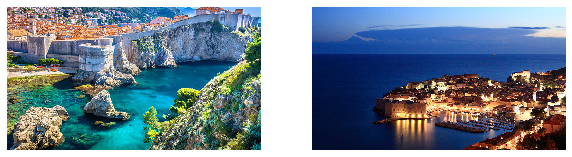

CYPRUS:


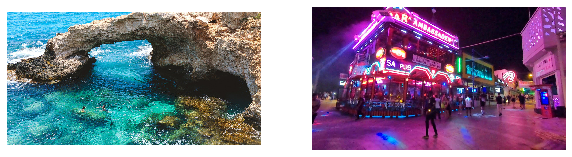

GREECE:


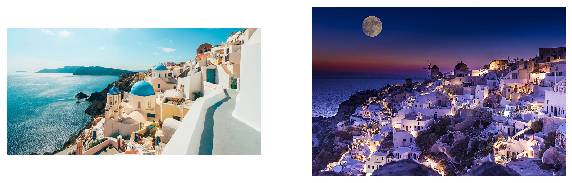

PORTUGAL:


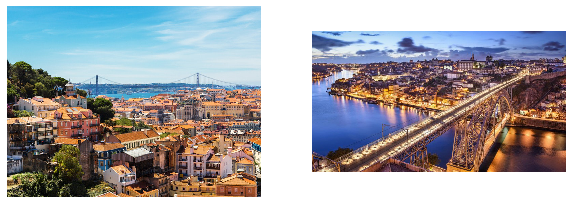

In [33]:
# Define the path where our pictura are being hold
croatia1 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/croatia.jpg")
croatia2 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/croatia2.jpg")
cyprus1 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/cyprus.jpg")
cyprus2 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/cyprus2.jpg")
greece1 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/greece.jpg")
greece2 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/greece2.jpg")
portugal1 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/portugal.jpg")
portugal2 = io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/portugal2.jpg")


print('\033[1m' + "CROATIA:")
f = plt.figure(figsize = (10,10))
f.add_subplot(1,2,1) # one line, two columns and plot in the first positon
plt.imshow(croatia1)
plt.axis("off")
f.add_subplot(1,2,2) # one line, two columns and plot in the second positon
plt.imshow(croatia2)
plt.axis("off")
plt.show()

print('\033[1m' + "CYPRUS:")
f = plt.figure(figsize = (10,10))
f.add_subplot(1,2,1)
plt.imshow(cyprus1)
plt.axis("off")
f.add_subplot(1,2,2)
plt.imshow(cyprus2)
plt.axis("off")
plt.show()

print('\033[1m' + "GREECE:")
f = plt.figure(figsize = (10,10))
f.add_subplot(1,2,1)
plt.imshow(greece1)
plt.axis("off")
f.add_subplot(1,2,2)
plt.imshow(greece2)
plt.axis("off")
plt.show()

print('\033[1m' + "PORTUGAL:")
f = plt.figure(figsize = (10,10))
f.add_subplot(1,2,1)
plt.axis("off")
plt.imshow(portugal1)
f.add_subplot(1,2,2)
plt.imshow(portugal2)
plt.axis("off")
plt.show()